In [71]:
import pandas as pd
import os

def read_csv_files(directory, file_extension):
    dfs = []

    for filename in os.listdir(directory):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

directory = 'data/'
combined_df = read_csv_files(directory, '2009.csv')


In [41]:
def display_dataframe_info(df):

    print("Basic information about the DataFrame:")
    print(df.info())

    print("\nSummary statistics of the DataFrame:")
    print(df.describe())

    print("\nFirst few rows of the DataFrame:")
    print(df.head())

In [42]:
def clean_data(df):
    df = df.drop_duplicates()
    df.drop('Unnamed: 27', axis=1, inplace=True)

    specific_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
    df[specific_columns] = df[specific_columns].fillna(0.0)

    numerical_columns = df.select_dtypes(include=['number']).columns
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)

    df = df.dropna()

    return df

In [58]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def convert_to_numeric(df):
    date_cols = df.select_dtypes(include=['datetime64']).columns
    reference_date = datetime(1970, 1, 1)
    for col in date_cols:
        df[col] = (df[col] - reference_date).dt.days

    label_encoder = LabelEncoder()
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        df[col] = label_encoder.fit_transform(df[col])
        
    df = df.drop(columns=string_cols)

    return df

In [69]:
import matplotlib.pyplot as plt

def select_top_correlated_features(df, target_column, num_features=5):
    numeric_df = df.select_dtypes(include=['number'])

    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[target_column].abs().sort_values(ascending=False)
    
    top_correlated_features = corr_with_target.drop(target_column)[:num_features]
    
    selected_feature_names = top_correlated_features.index.tolist()
    selected_feature_names.append(target_column)
    selected_df = df[selected_feature_names]

    selected_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    return selected_df

In [44]:
from sklearn.preprocessing import StandardScaler

def scale_data(df):
    numeric_df = df.select_dtypes(include=['number'])
    scaler = StandardScaler()

    scaled_data = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns, index=df.index)

    for column in df.columns:
        if column not in numeric_df.columns:
            scaled_df[column] = df[column]

    return scaled_df

C:\Users\Julia\AppData\Local\Temp\ipykernel_30980\1123687757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 27', axis=1, inplace=True)
C:\Users\Julia\AppData\Local\Temp\ipykernel_30980\1123687757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[specific_columns] = df[specific_columns].fillna(0.0)
C:\Users\Julia\AppData\Local\Temp\ipykernel_30980\1123687757.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This

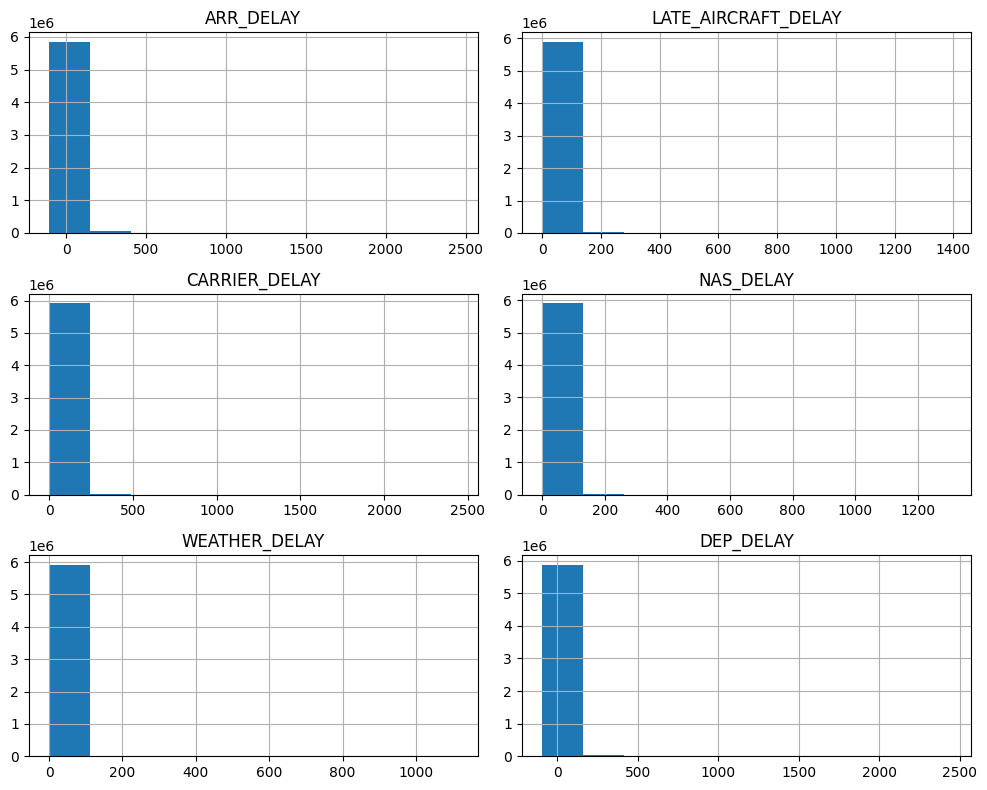

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5918486 entries, 0 to 6429337
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ARR_DELAY            float64
 1   LATE_AIRCRAFT_DELAY  float64
 2   CARRIER_DELAY        float64
 3   NAS_DELAY            float64
 4   WEATHER_DELAY        float64
 5   DEP_DELAY            float64
dtypes: float64(6)
memory usage: 316.1 MB
None

Summary statistics of the DataFrame:
          ARR_DELAY  LATE_AIRCRAFT_DELAY  CARRIER_DELAY     NAS_DELAY  \
count  5.918486e+06         5.918486e+06   5.918486e+06  5.918486e+06   
mean   8.244404e-17         4.331578e-17   8.403837e-18 -7.491420e-18   
std    1.000000e+00         1.000000e+00   1.000000e+00  1.000000e+00   
min   -3.201212e+00        -2.065561e-01  -1.574318e-01 -2.135695e-01   
25%   -4.774696e-01        -2.065561e-01  -1.574318e-01 -2.135695e-01   
50%   -2.481018e-01        -2.065561e-01  -1.574318e-01 -2.

In [70]:
def prepare_data(df):
    #display_dataframe_info(df)

    cleaned_df = clean_data(df)
    #display_dataframe_info(cleaned_df)

    converted_df = convert_to_numeric(cleaned_df)
    #display_dataframe_info(cleaned_df)

    selected_features_df = select_top_correlated_features(converted_df, 'DEP_DELAY', 5)

    scaled_df = scale_data(selected_features_df)
    display_dataframe_info(scaled_df)

prepare_data(combined_df)